<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/task_of_aims_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri Seti Açıklaması

Churn_Demo.txt                   : Müşteri ile ilgili kullanım, demografik ve terk etme durumu verilerinin yer aldığı veri setidir.

ID                               : Müşteri Numarası

Roaming                    : Dolaşımda Konuşma Süresi

International                    : Uluslararası Konuşma Süresi

Local                            : Yurt içi Konuşma Süresi

Dropped                          : Hat Düşme Sayısı

Paymethod                        : Ödeme Yöntemi

LocalPlan                        : Yurt içi Tarifesi

RoamingPlan                      : Dolaşım Tarifesi

Sex                              : Cinsiyet

Status                           : Medeni Durum 

Children                         : Çocuk Sayısı

Est_Income                       : Tahmini Gelir

Car_Owner                        : Araç Sahipliği

Usage                            : Kullanım

Age                              : Yaş

Overall Satisfaction             : Genel Memnuniyet Skoru

Churn                            : Müşteri Terk Durumu
-----------------
Comments_Demo.txt                : Müşterilerin çağrı merkezi görüşmelerindeki konuşma içeriklerinin yer aldığı dosyadır.
ID                               : Müşteri Numarası
Comments                         : Konuşma içeriği

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/churn_Demo.txt")
df

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.00,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.00,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,3821,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,3822,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,3823,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
2068,3824,26.49,0.00,12.46,0,CC,FreeLocal,Standard,F,M,2,28220.80,N,38.95,38.766667,4,Vol


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2070 non-null   int64  
 1   Roaming               2070 non-null   float64
 2   International         2070 non-null   float64
 3   Local                 2070 non-null   float64
 4   Dropped               2070 non-null   int64  
 5   Paymethod             2070 non-null   object 
 6   LocalPlan             2070 non-null   object 
 7   RoamingPlan           2070 non-null   object 
 8   Sex                   2070 non-null   object 
 9   Status                2070 non-null   object 
 10  Children              2070 non-null   int64  
 11  Est_Income            2070 non-null   float64
 12  Car_Owner             2070 non-null   object 
 13  Usage                 2070 non-null   float64
 14  Age                   2070 non-null   float64
 15  Overall Satisfaction 

In [5]:
df.describe()

,ID,Roaming,International,Local,Dropped,Children,Est_Income,Usage,Age,Overall Satisfaction
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,1901.151691,16.129338,1.207295,59.080812,0.135749,1.147826,51464.262406,75.855063,42.798081,2.509662
std,1094.709118,9.866626,2.625421,57.542526,0.526189,0.843124,30796.680570,59.741635,14.883739,1.125157
min,1.000000,0.000000,0.000000,0.680000,0.000000,0.000000,96.330000,0.680000,12.326667,1.000000
25%,972.250000,8.090000,0.000000,15.200000,0.000000,0.000000,21084.700000,34.250000,30.886667,2.000000
50%,1874.000000,16.140000,0.000000,39.620000,0.000000,1.000000,55860.000000,57.110000,45.526667,2.000000
75%,2832.000000,22.990000,0.000000,87.460000,0.000000,2.000000,78000.000000,107.020000,54.013333,4.000000
max,3825.000000,59.000000,9.700000,332.460000,4.000000,2.000000,120000.000000,361.880000,77.000000,4.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

ID                      0
Roaming                 0
International           0
Local                   0
Dropped                 0
Paymethod               0
LocalPlan               0
RoamingPlan             0
Sex                     0
Status                  0
Children                0
Est_Income              0
Car_Owner               0
Usage                   0
Age                     0
Overall Satisfaction    0
Churn                   0
dtype: int64

In [8]:
df.shape


(2070, 17)

In [9]:
df.head()

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.0,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.0,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.0,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol


In [10]:
df.tail().T

,2065,2066,2067,2068,2069
ID,3821,3822,3823,3824,3825
Roaming,0.37,22.17,28.92,26.49,13.19
International,0.0,0.57,0.0,0.0,0.0
Local,28.66,13.45,45.47,12.46,87.09
Dropped,0,0,0,0,0
Paymethod,CC,Auto,CH,CC,CC
LocalPlan,FreeLocal,Budget,Budget,FreeLocal,FreeLocal
RoamingPlan,Standard,Standard,Standard,Standard,Standard
Sex,F,F,F,F,F
Status,S,S,M,M,S


In [11]:
# value countsa for dongusu yap

In [12]:
df["Paymethod"].value_counts()

CC      1237
Auto     452
CH       381
Name: Paymethod, dtype: int64

In [13]:
df["Sex"].value_counts()

F    1320
M     750
Name: Sex, dtype: int64

In [14]:
df["Churn"].value_counts()

Current    1283
Vol         787
Name: Churn, dtype: int64

In [15]:
df["LocalPlan"].value_counts()

Budget       1130
FreeLocal     940
Name: LocalPlan, dtype: int64

In [16]:
df["Car_Owner"].value_counts()

N    1342
Y     728
Name: Car_Owner, dtype: int64

In [17]:
df["RoamingPlan"].value_counts()

Standard          1431
Intnl_discount     639
Name: RoamingPlan, dtype: int64

In [18]:
df["Overall Satisfaction"].value_counts()

2    563
4    550
1    501
3    456
Name: Overall Satisfaction, dtype: int64

In [19]:
df["Status"].value_counts()

M    1226
S     817
D      27
Name: Status, dtype: int64

In [20]:
df["International"].value_counts()

0.00    1570
0.86      23
8.32      15
4.94      12
1.61      12
        ... 
7.34       1
8.21       1
6.46       1
6.61       1
9.69       1
Name: International, Length: 87, dtype: int64

In [21]:
df.duplicated().sum()

0

Current    1283
Vol         787
Name: Churn, dtype: int64


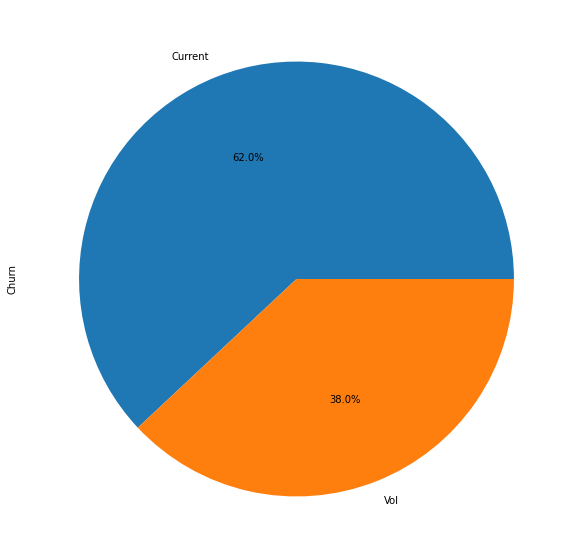

In [22]:
print(df["Churn"].value_counts())
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

<AxesSubplot: >

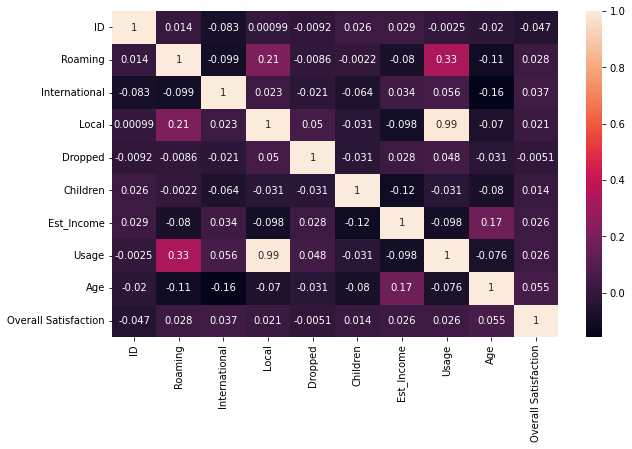

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
# Usage = Local + international oldugu icin local ve international columlari drop edilebilir.
# usage il localin cor yuksek cikma sebebi international konusmalarin etkisinin az olmasi.

In [25]:
df[["Local","Usage"]]

,Local,Usage
0,206.08,229.64
1,45.50,75.29
2,22.44,47.25
3,32.88,59.01
4,23.11,28.14
...,...,...
2065,28.66,29.04
2066,13.45,36.20
2067,45.47,74.40
2068,12.46,38.95


In [26]:
#sns.countplot(data=df[["Local","Usage","International"]], x="Local", hue="Usage")

In [27]:
num_col = []
for column in df:
    if df[column].dtypes!='object':
        	num_col.append(column) 

In [28]:
num_col

['ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction']

In [29]:
df_num = df[['Churn','ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction']]

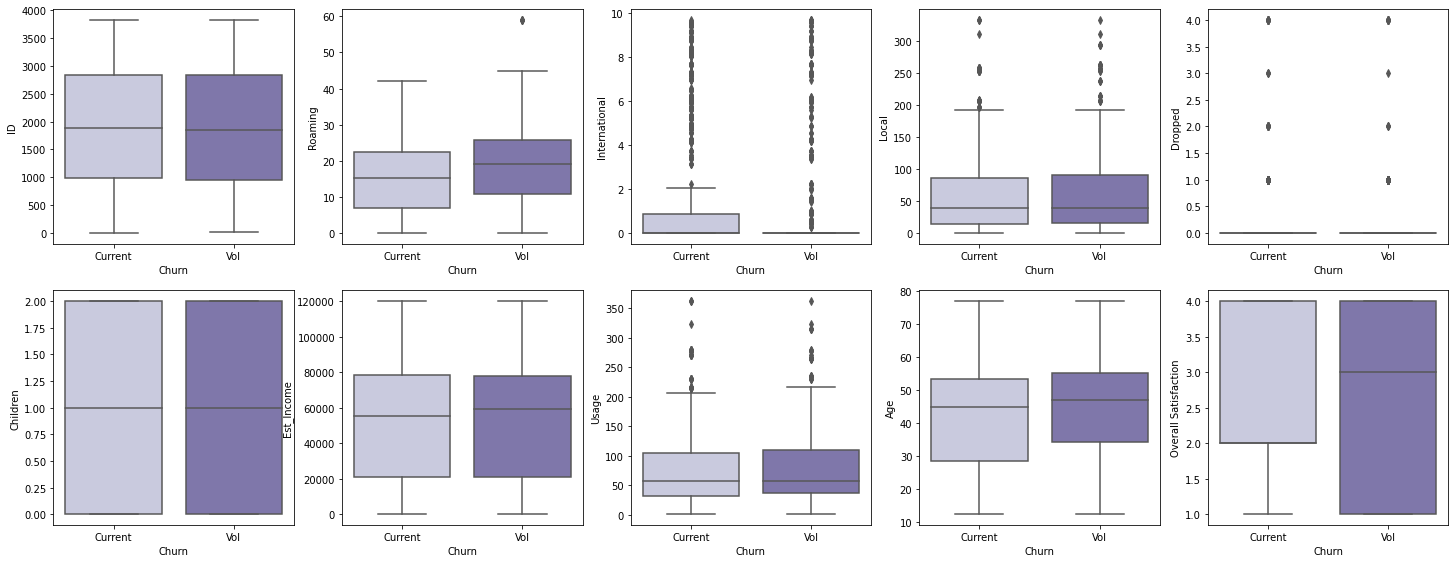

In [30]:
index = 0
plt.figure(figsize=(25,25))
for feature in df_num:
    if feature != "Churn":
        index += 1
        plt.subplot(5, 5, index)
        sns.boxplot(x='Churn',palette="Purples",y=feature, data=df_num)

In [31]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))



categ numericals columns are ['Dropped', 'Paymethod', 'LocalPlan', 'RoamingPlan', 'Sex', 'Status', 'Children', 'Car_Owner', 'Overall Satisfaction', 'Churn']


In [32]:
# matplotlip version ile alakali bu hata

In [33]:
#pip install matplotlib --upgrade

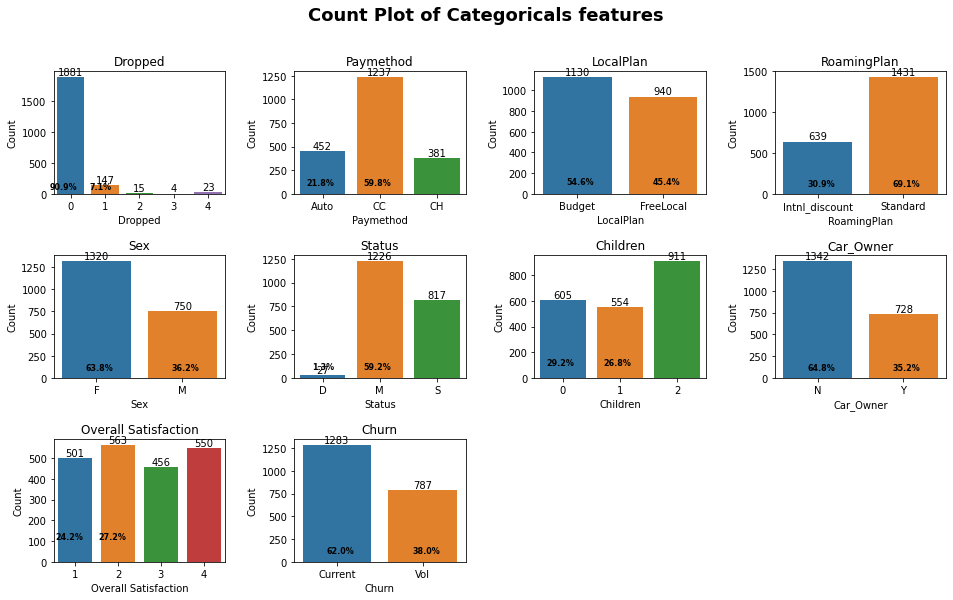

In [34]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(5, 4, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=8, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=8, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

In [35]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

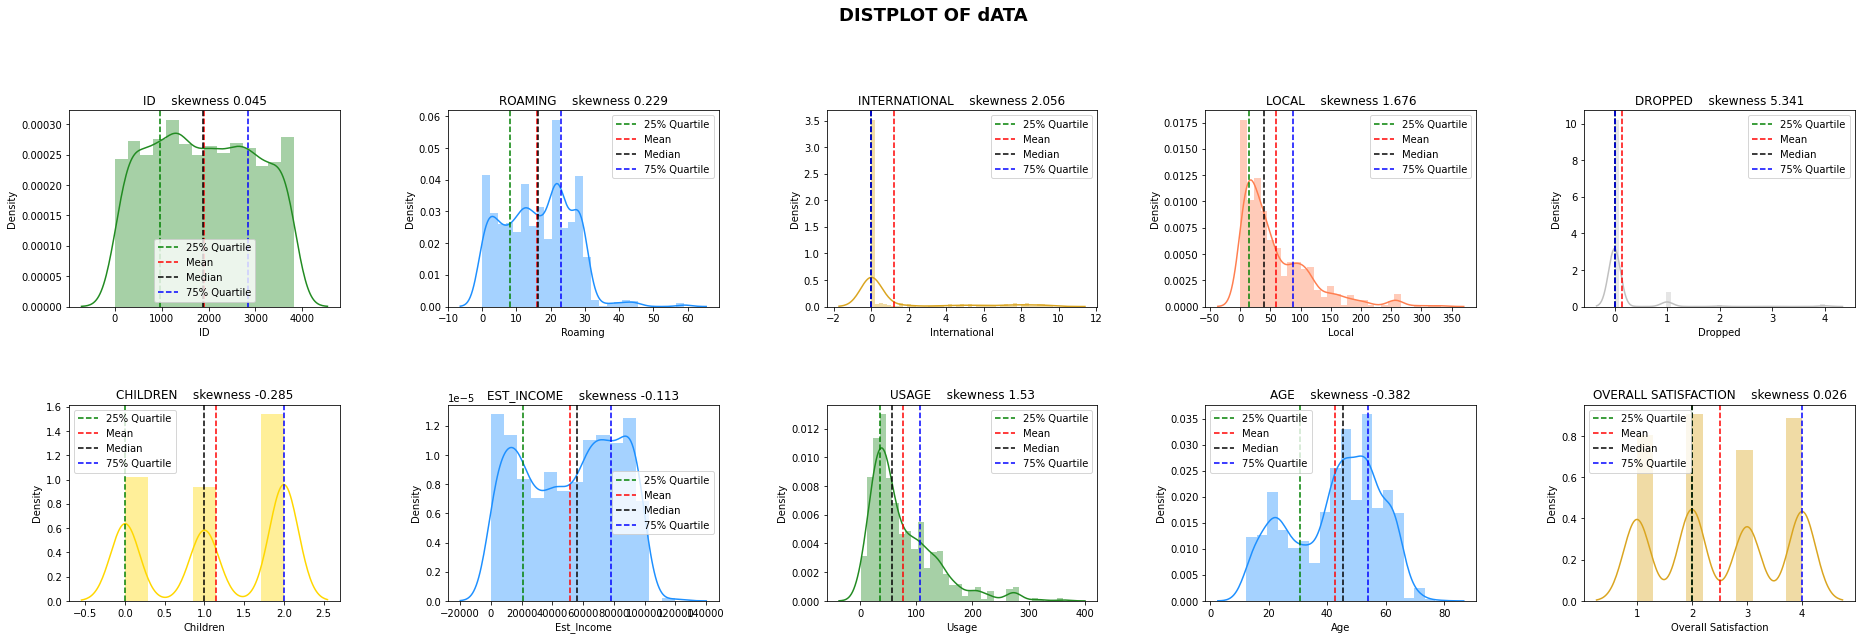

In [36]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col):
    ax = fig.add_subplot(5, 5, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10) 

In [37]:
# curenrt ile val dagilimlarini target dagilimina bakabilirsin
# plotly de yaparsan color eklersen daha iyi olir

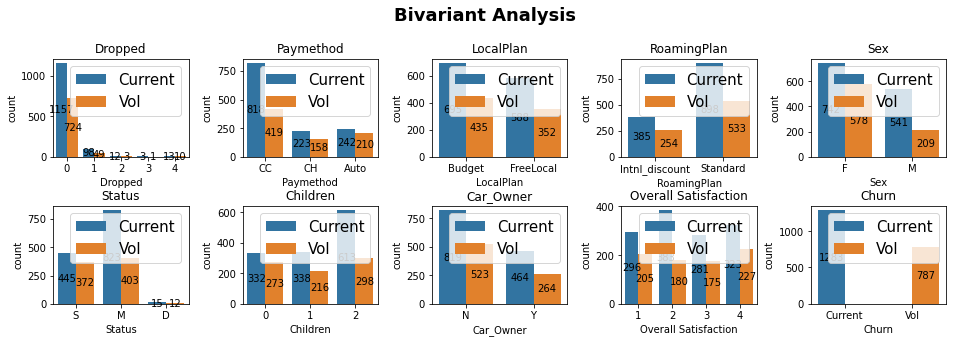

In [38]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(5, 5, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['Churn'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

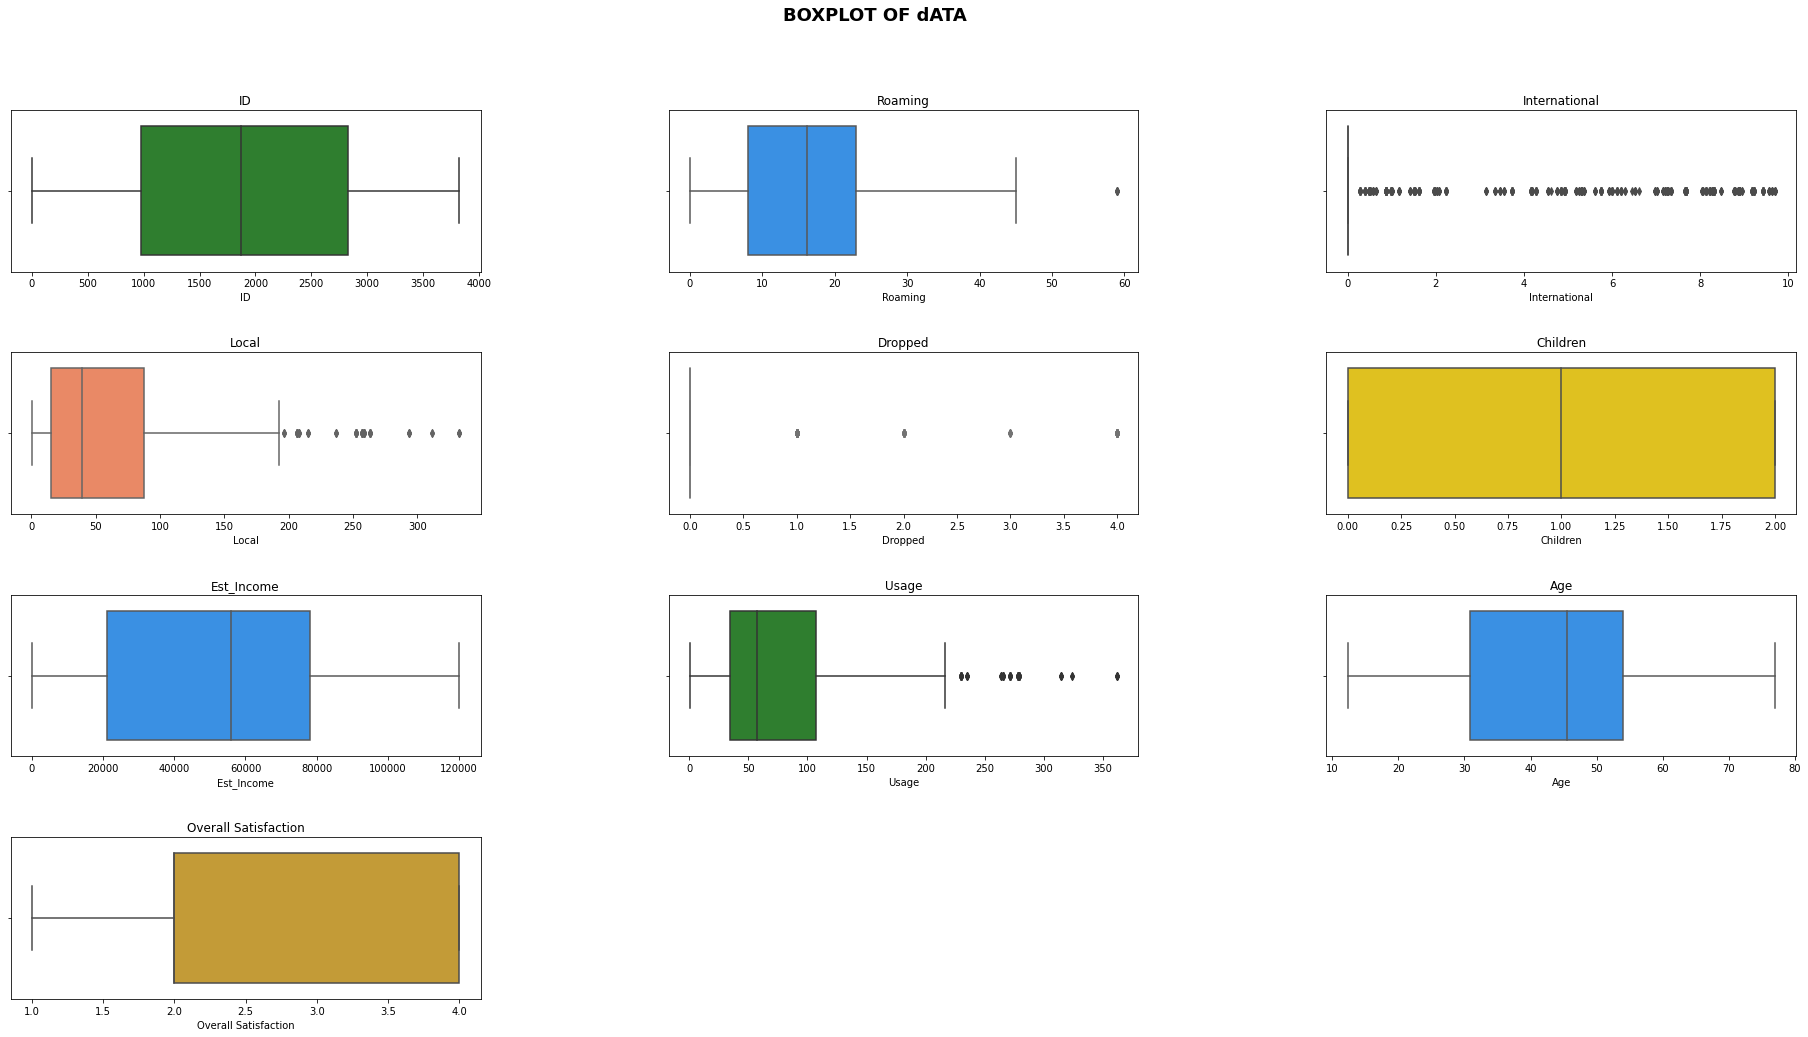

In [39]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

# feature engineering

In [40]:
df.sample(3).T

,636,218,293
ID,1204,422,550
Roaming,11.96,0.0,26.49
International,0.0,0.0,0.0
Local,25.58,0.97,12.46
Dropped,0,0,0
Paymethod,CC,Auto,CC
LocalPlan,FreeLocal,Budget,FreeLocal
RoamingPlan,Standard,Standard,Standard
Sex,M,F,F
Status,M,M,M


In [41]:
# drop edilecek columlar; 
# id ,
# usage = local + international oldugunda ve internationalin etkisi cok az oldugundan feature engineering yapilip usage birakilir
# local ve international drop edilir.


In [42]:
df.drop(columns=['ID', 'International','Local'], inplace=True)

In [43]:
df.columns

Index(['Roaming', 'Dropped', 'Paymethod', 'LocalPlan', 'RoamingPlan', 'Sex',
       'Status', 'Children', 'Est_Income', 'Car_Owner', 'Usage', 'Age',
       'Overall Satisfaction', 'Churn'],
      dtype='object')

In [44]:
df.corr()

,Roaming,Dropped,Children,Est_Income,Usage,Age,Overall Satisfaction
Roaming,1.000000,-0.008627,-0.002231,-0.079956,0.330701,-0.107135,0.027840
Dropped,-0.008627,1.000000,-0.031092,0.028236,0.048322,-0.031355,-0.005074
Children,-0.002231,-0.031092,1.000000,-0.116552,-0.030634,-0.079816,0.014288
Est_Income,-0.079956,0.028236,-0.116552,1.000000,-0.097799,0.165739,0.025773
Usage,0.330701,0.048322,-0.030634,-0.097799,1.000000,-0.075551,0.026274
Age,-0.107135,-0.031355,-0.079816,0.165739,-0.075551,1.000000,0.055447
Overall Satisfaction,0.027840,-0.005074,0.014288,0.025773,0.026274,0.055447,1.000000


In [45]:
# df corr icinde churn yok ncode et sonra yeniden dene 

In [46]:
enc = {"Vol":1, "Current":0}  
df["churn"] = df["Churn"].replace(enc)

In [47]:
df.churn.value_counts()

0    1283
1     787
Name: churn, dtype: int64

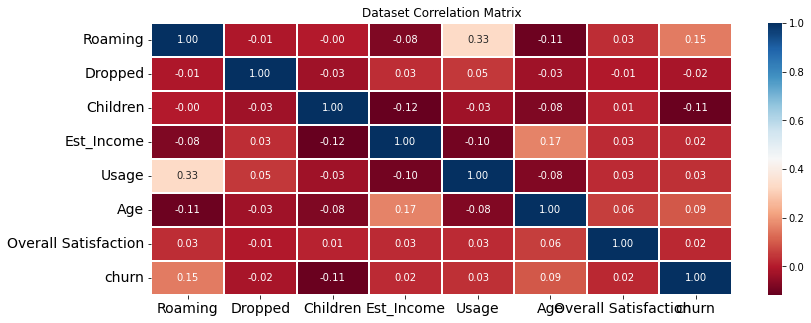

In [48]:
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

In [49]:
df.drop(columns=['Churn'], inplace=True)

# Data Pre-Processing

- ordinal  encoding in 3 oneli ozelligi
   - feature importance olmasi gereken sekilde siralanmasini saglior mesela burda once one hot encoding yaptigimda sex m en entkisiz feature olurken
   - sex f en etkili feature oldu oysaki burda encodingler kullanilsaydi bir birine daha yakin yerlerde olurdu siralamalari.
   -

In [50]:
# df_dummy= pd.get_dummies(df)
# buna dikkat et data lekage sebep vercek bir hareket 
# ordinal encoding yapman lazim data lekage ortaya cikiyor gormemeisi gereken kismi gormus 
# bu encoding yapman lazim 
# one hot encoing ya da label encoding yap

- ordinal encoder = egr bizim datamizdaki sutunlar bir kesikli continues ise ( aralik var ise 78-90 arasi a puani gibi) veya bir biri uzerine ustunluk belirten,boyut belirten durum var ise (l,smal ,xl gibi),(derecelendirmeler 1.,2., 3. gibi) 
- one hot = nominal kategorik verilerde (cinsiyet ayirirken , renk ayirrken , ustunluk olmayan durumlarda kullanilir)
- get dummy = featurdaki verileri alir ayri ayri feature a donusturr matematiksel deger ver. mesela erkek ve kadin varsa erkek ve kadin icin ayri ayri sutun olusturur eger kisi erkek ise orda 1 diger yerlerde 0 donduurur gibi.

In [51]:
categ_columns

['Dropped',
 'Paymethod',
 'LocalPlan',
 'RoamingPlan',
 'Sex',
 'Status',
 'Children',
 'Car_Owner',
 'Overall Satisfaction',
 'Churn']

In [52]:
df['Overall Satisfaction'].value_counts()

2    563
4    550
1    501
3    456
Name: Overall Satisfaction, dtype: int64

In [53]:
df['Car_Owner'].value_counts()


N    1342
Y     728
Name: Car_Owner, dtype: int64

In [54]:
df['Children'].value_counts()

2    911
0    605
1    554
Name: Children, dtype: int64

In [55]:
df['Status'].value_counts()

M    1226
S     817
D      27
Name: Status, dtype: int64

In [56]:
df['RoamingPlan'].value_counts()

Standard          1431
Intnl_discount     639
Name: RoamingPlan, dtype: int64

In [57]:
df['Dropped'].value_counts()

0    1881
1     147
4      23
2      15
3       4
Name: Dropped, dtype: int64

In [58]:
df['Paymethod'].value_counts()

CC      1237
Auto     452
CH       381
Name: Paymethod, dtype: int64

In [59]:
df['LocalPlan'].value_counts()

Budget       1130
FreeLocal     940
Name: LocalPlan, dtype: int64

In [60]:
# endcoderi pipeline a koy 
# bu islemlere bile gerek yok

In [61]:
"""from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['RoamingPlan'] = le.fit_transform(df[['RoamingPlan']])
df['Paymethod'] = le.fit_transform(df[['Paymethod']])
df['LocalPlan'] = le.fit_transform(df[['LocalPlan']])
df['Status'] = le.fit_transform(df[['Status']])
df['Car_Owner'] = le.fit_transform(df[['Car_Owner']])"""




"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\n\ndf['RoamingPlan'] = le.fit_transform(df[['RoamingPlan']])\ndf['Paymethod'] = le.fit_transform(df[['Paymethod']])\ndf['LocalPlan'] = le.fit_transform(df[['LocalPlan']])\ndf['Status'] = le.fit_transform(df[['Status']])\ndf['Car_Owner'] = le.fit_transform(df[['Car_Owner']])"

In [62]:
# one hot , make colum transform() reminder pass true ()

In [63]:
""" enc2 = OrdinalEncoder(categories=[['F', 'M']])
df['Sex'] = enc2.fit_transform(df[['Sex']]) """

" enc2 = OrdinalEncoder(categories=[['F', 'M']])\ndf['Sex'] = enc2.fit_transform(df[['Sex']]) "

In [64]:
df.shape

(2070, 14)

In [65]:
df.sample(2)

,Roaming,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,churn
1746,0.69,0,CC,Budget,Standard,F,M,2,11234.7,Y,113.42,49.046667,2,0
1681,0.87,0,Auto,FreeLocal,Intnl_discount,M,S,0,90321.6,N,12.39,38.000000,2,0


In [66]:
df.sample().T

,985
Roaming,5.72
Dropped,0
Paymethod,CC
LocalPlan,Budget
RoamingPlan,Intnl_discount
Sex,M
Status,M
Children,0
Est_Income,3911.9
Car_Owner,N


In [67]:
# pipeline kullanmam lazim burda data lekage engelleyecek 
#  

In [68]:
categ_columns

['Dropped',
 'Paymethod',
 'LocalPlan',
 'RoamingPlan',
 'Sex',
 'Status',
 'Children',
 'Car_Owner',
 'Overall Satisfaction',
 'Churn']

In [69]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [70]:
cat_onehot = ["Sex","Car_Owner"]

In [71]:
cat_ordinal =['Dropped',
 'Paymethod',
 'LocalPlan',
 'RoamingPlan',
 'Status',
 'Children',
 'Overall Satisfaction'] 

In [113]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False,drop="first"), cat_onehot), 
                                       (OrdinalEncoder(categories='auto'), cat_ordinal),
                                       remainder= MinMaxScaler()) 

In [114]:
operations = [("preprocessor", column_trans), ("Log_model", LogisticRegression(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [115]:
df, predict = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.95*len(df))])

In [116]:
X = df.drop(["churn"], axis=1)
y = df["churn"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)

In [118]:

def model_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [119]:
pipe_model.fit(X_train, y_train)
model_scorer(pipe_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.645238,0.598930
Precision,0.567164,0.562500
Recall,0.240506,0.227848
f1,0.337778,0.324324


In [120]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
df_scores.mean()[2:]

test_accuracy      0.633929
train_accuracy     0.645304
test_precision     0.530068
train_precision    0.563233
test_recall        0.238938
train_recall       0.255449
test_f1            0.327774
train_f1           0.351299
dtype: float64

In [121]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(max_iter=5000,random_state = 42))]
pipe_model_log_grid = Pipeline(steps=operations)

In [122]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

param_grid = {"logm__penalty" : penalty,
             "logm__l1_ratio" : l1_ratio,
             "logm__C" : C,
             "logm__solver" : solver
             }

In [123]:
grid_log_model = GridSearchCV(pipe_model_log_grid, param_grid = param_grid, scoring="recall", cv=10)

In [124]:
grid_log_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Sex',
                                                                          'Car_Owner']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['Dropped'

In [125]:
model_scorer(grid_log_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.644643,0.598930
Precision,0.560137,0.562500
Recall,0.257911,0.227848
f1,0.353196,0.324324


In [126]:
grid_log_model.best_params_

{'logm__C': 11.28837891684689,
 'logm__l1_ratio': 0.0,
 'logm__penalty': 'l1',
 'logm__solver': 'saga'}

In [127]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(max_iter=5000,
                                                                      random_state = 42, C= 3.3598182862837818,
                                                                      l1_ratio= 0.0,
                                                                      penalty= 'l2',
                                                                      solver= 'liblinear'))]
pipe_model_log_final = Pipeline(steps=operations)

In [128]:
pipe_model_log_final.fit(X_train, y_train)
log_scorer= model_scorer(pipe_model_log_final, X_train, y_train, X_test, y_test)
log_scorer

,train_set,test_set
Accuracy,0.647024,0.598930
Precision,0.568421,0.562500
Recall,0.256329,0.227848
f1,0.353326,0.324324


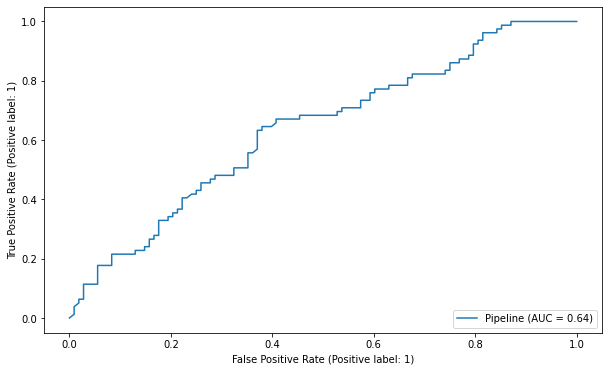

In [129]:
plot_roc_curve(pipe_model_log_final, X_test, y_test);

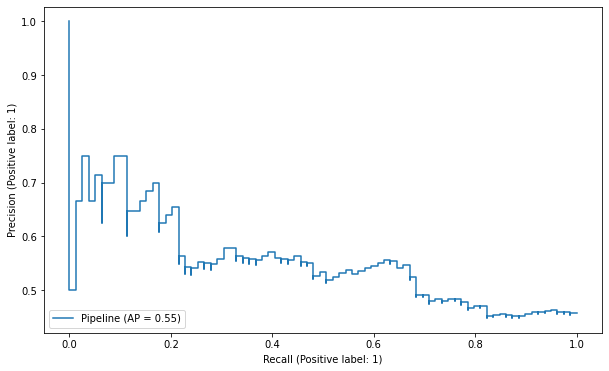

In [130]:
plot_precision_recall_curve(pipe_model_log_final, X_test, y_test);

In [131]:
log_acc = log_scorer["test_set"][0]

# Xg_Boost

In [132]:
#  pipe line kullan burda da 

In [133]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [134]:
pipe_model_Xgboost.fit(X_train, y_train)
model_scorer(pipe_model_Xgboost ,X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.738095,0.636364
Precision,0.744898,0.622222
Recall,0.462025,0.354430
f1,0.570312,0.451613


In [135]:
xgb_params = {"Xgboost__n_estimators": [50, 100, 150],
             "Xgboost__subsample":[0.6,0.8,1],
             "Xgboost__max_depth":[3,5,7],
             "Xgboost__learning_rate":[0.1,0.001,0.01]}

In [136]:
xgb_grid_model = GridSearchCV(pipe_model_Xgboost , xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [137]:
xgb_grid_model.best_params_

{'Xgboost__learning_rate': 0.1,
 'Xgboost__max_depth': 5,
 'Xgboost__n_estimators': 50,
 'Xgboost__subsample': 0.8}

In [138]:
# grid yerine optuna kullan. sonra grid dene

In [139]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,
                                                                    random_state=42,
                                                                    learning_rate = 0.1, 
                                                                    max_depth = 5, 
                                                                    n_estimators= 100, 
                                                                    subsample= 0.8))]
pipe_final_xgb_model = Pipeline(steps=operations)

In [140]:
pipe_final_xgb_model.fit(X_train, y_train)
xgb_scorer = model_scorer(pipe_final_xgb_model, X_train, y_train, X_test, y_test)
xgb_scorer

,train_set,test_set
Accuracy,0.814881,0.631016
Precision,0.812865,0.586207
Recall,0.659810,0.430380
f1,0.728384,0.496350


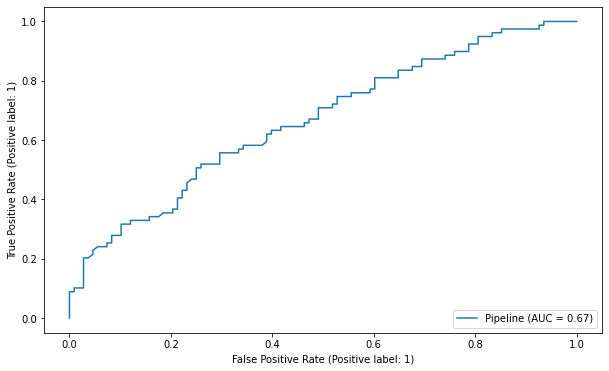

In [141]:
plot_roc_curve(pipe_final_xgb_model, X_test, y_test);

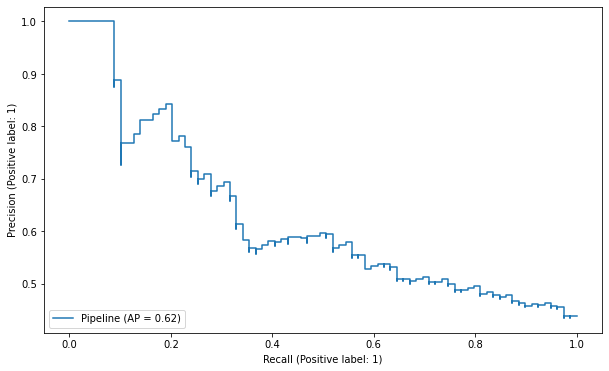

In [142]:
plot_precision_recall_curve(pipe_final_xgb_model, X_test, y_test);

In [143]:
#  trasehold ile oyna  , degeisik agirliklari dene ayri ayri dene.

In [144]:
xb_acc = xgb_scorer["test_set"][0]

In [145]:
pipe_final_xgb_model.steps[1][1].feature_importances_

array([0.14851649, 0.05199145, 0.07920869, 0.07165717, 0.04213133,
       0.07301027, 0.08346004, 0.08260778, 0.05404028, 0.0937214 ,
       0.07586356, 0.06836637, 0.07542517], dtype=float32)

In [172]:
feats = pd.DataFrame(index=X.columns, data=pipe_final_xgb_model.steps[1][1].feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

,Feature Importance
Roaming,0.148516
Car_Owner,0.093721
Status,0.083460
Children,0.082608
Paymethod,0.079209
Usage,0.075864
Overall Satisfaction,0.075425
Sex,0.073010
LocalPlan,0.071657
Age,0.068366


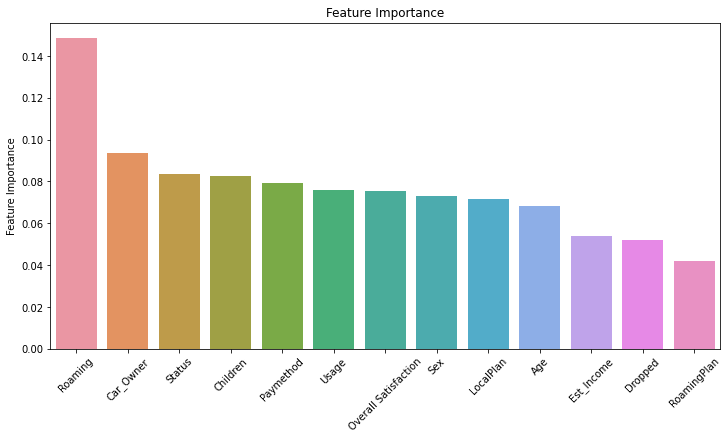

In [173]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

# # # 

In [151]:
df0 = pd.read_csv('/content/drive/MyDrive/Data/Comments_Demo.csv')

In [152]:
df = df0.copy()
df.sample(13)

,"ID,Comments"
370,2911|Wants information on our Internet service...
2056,"2512,""Called about new plan. Might switch soon..."
937,"334,""transferred to manager ASAP"""
769,"1816,""The customer was very unhappy with the w..."
1656,1038|Needs help learning how to use the phone....
1677,2429|She wants a new phone. Has tried to use a...
1651,3130|Needs help with basic phone usage. I sugg...
598,1775|Wanted to know the nearest store location...
1453,"2415,""Wanted to know the nearest store locatio..."
1062,"1363,""Handset sucked"""


In [153]:
""" def split_sep(x):
  if x.__contains__(","):
      return x.split(",")[0]
  elif x.__contains__("\|") :
      return x.split("\|")[0]
df["id"] = df["ID,Comments"].apply(split_sep)"""

' def split_sep(x):\n  if x.__contains__(","):\n      return x.split(",")[0]\n  elif x.__contains__("\\|") :\n      return x.split("\\|")[0]\ndf["id"] = df["ID,Comments"].apply(split_sep)'

In [154]:
"""def split_sep1(x):
  if x.__contains__(","):
      return x.split(",")[1]
  elif x.__contains__("\|") :
      return x.split("\|")[1]
df["Comments"] = df["ID,Comments"].apply(split_sep1)"""

'def split_sep1(x):\n  if x.__contains__(","):\n      return x.split(",")[1]\n  elif x.__contains__("\\|") :\n      return x.split("\\|")[1]\ndf["Comments"] = df["ID,Comments"].apply(split_sep1)'

In [155]:
df["ID,Comments"] = df["ID,Comments"].str.replace('|','__').astype("str")
df["ID,Comments"] = df["ID,Comments"].str.replace(',','__')
df["ID,Comments"] = df["ID,Comments"].str.split("__")
df["ID"] = df["ID,Comments"].apply(lambda x : x[0])
df["Comments"] = df["ID,Comments"].apply(lambda x : x[1])
df.drop(columns="ID,Comments",inplace=True)
df.sample

<bound method NDFrame.sample of         ID                                           Comments
0     1309  "Does not like the way the phone works. It is ...
1     3556  "Wanted to know the nearest store location. Wa...
2     2230  "Wants to know how to do text messaging. Refer...
3     2312  "Asked how to disable call waiting. referred h...
4     3327  "Needs help learning how to use the phone. I s...
...    ...                                                ...
2061  1453  "Asked about how to change his ring tones. Ref...
2062   383                                   "Handset sucked"
2063  2204  "Wants information on our Internet service. Re...
2064   505  "Wanted to know the nearest store location. Wa...
2065  3034  "Needed help figuring out his bill. I explaine...

[2066 rows x 2 columns]>

In [156]:
df.sample(16)

,ID,Comments
232,1127,"""Cant get his call forwarding to work. I shoul..."
1753,2132,"""Hopes to get an additonal line working by the..."
1655,461,Wants to change address.
1453,2415,"""Wanted to know the nearest store location. Wa..."
463,1218,"""Wanted to know the nearest store location. Wa..."
1709,972,Wants to change address.
1343,3169,"""Wanted to know the nearest store location. Wa..."
505,3742,Wants to change rate plans to get family all o...
942,2181,"""Hopes to get an additonal line working by the..."
1051,3640,Hopes to get an additonal line working by the ...


In [158]:
df

,ID,Comments
0,1309,"""Does not like the way the phone works. It is ..."
1,3556,"""Wanted to know the nearest store location. Wa..."
2,2230,"""Wants to know how to do text messaging. Refer..."
3,2312,"""Asked how to disable call waiting. referred h..."
4,3327,"""Needs help learning how to use the phone. I s..."
...,...,...
2061,1453,"""Asked about how to change his ring tones. Ref..."
2062,383,"""Handset sucked"""
2063,2204,"""Wants information on our Internet service. Re..."
2064,505,"""Wanted to know the nearest store location. Wa..."


In [159]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 17.3 MB/s 
     |████████████████████████████████| 81 kB 10.0 MB/s 
     |████████████████████████████████| 5.8 MB 68.2 MB/s 
     |████████████████████████████████| 213 kB 69.7 MB/s 
     |████████████████████████████████| 132 kB 66.2 MB/s 
     |████████████████████████████████| 182 kB 67.7 MB/s 
     |████████████████████████████████| 127 kB 86.2 MB/s 
     |████████████████████████████████| 7.6 MB 71.4 MB/s 
     |████████████████████████████████| 1.3 MB 78.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [160]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [161]:
y_pred = []
for i in df["Comments"]:
  if classifier(i)[0]["label"] == "POSITIVE":
    y_pred.append(0)
  else:
    y_pred.append(1)
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [162]:
predict = pd.DataFrame(y_pred, columns= ["Prediction"])
predict

,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
2061,1
2062,1
2063,1
2064,1


In [163]:
predict["Prediction"].value_counts()

1    2004
0      62
Name: Prediction, dtype: int64

1    2004
0      62
Name: Prediction, dtype: int64


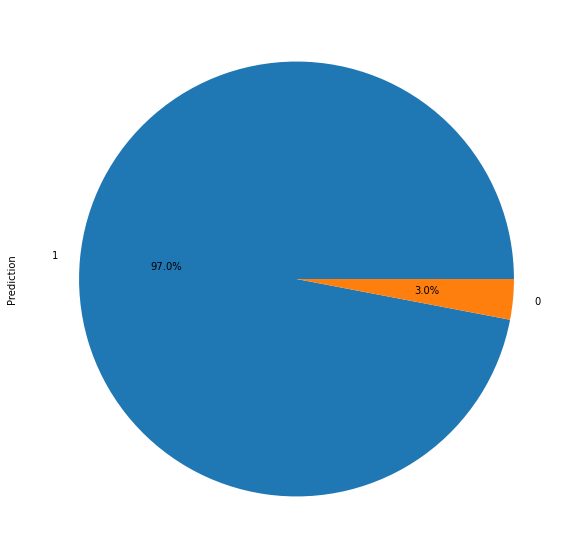

In [164]:
print(predict["Prediction"].value_counts())
predict["Prediction"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [165]:
predict = pd.DataFrame(y_pred, columns= ["Prediction"])

In [166]:
predict

,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
2061,1
2062,1
2063,1
2064,1


In [167]:
df_result = pd.concat([df["Comments"], predict["Prediction"]], axis= 1)

In [168]:
df_result.head()

,Comments,Prediction
0,"""Does not like the way the phone works. It is ...",1
1,"""Wanted to know the nearest store location. Wa...",1
2,"""Wants to know how to do text messaging. Refer...",1
3,"""Asked how to disable call waiting. referred h...",1
4,"""Needs help learning how to use the phone. I s...",1


In [169]:
df_result["Prediction"].value_counts()

1    2004
0      62
Name: Prediction, dtype: int64

1    2004
0      62
Name: Prediction, dtype: int64


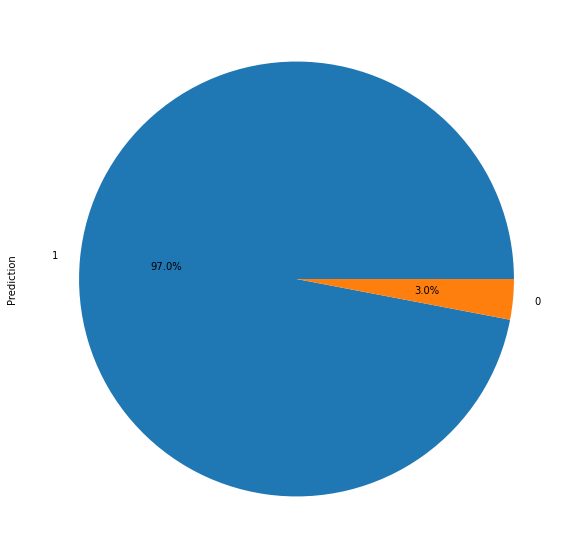

In [170]:
print(df_result["Prediction"].value_counts())
df_result["Prediction"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

- Bundan onceki calisma comentler eklenmeden yapilmistir
- ama burdan asagida comment ler ile ilgili gerekli analizler eklenerek calismaya devam edilmistir.

In [ ]:
X_pred = predict.drop(["churn"], axis=1)
y_real = predict[["churn"]].reset_index()

In [ ]:
y_pred = pipe_final_xgb_model.predict(X_pred)

In [ ]:
y_pred_proba = pd.DataFrame(pipe_final_xgb_model.predict_proba(X_pred))

In [ ]:
df_result = pd.concat((y_real, pd.Series(y_pred,name="predict").to_frame(), 
                       y_pred_proba), axis=1)
df_result

In [ ]:
# ordinal encod kullanmadigindan hatali.
# get dummy sadece sacde analiz etmen lazimken kullanir
# hepsine ordinal encoding kullan.
# ml de get dummy kullanilmazzz dikkat et
# 

In [ ]:
model_scorer = pd.concat((log_scorer, xgb_scorer), axis=1)
model_scorer

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "XGBoost"],
                        "accuracy": [log_acc, xb_acc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.text(width,                            
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),             
                ha = 'left',                        
                va = 'center')                         
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

In [ ]:
import pickle 

In [ ]:
pickle_out = open("XGBClassifier.pkl", "wb")
pickle.dump(pipe_final_xgb_model, pickle_out)
pickle_out.close()